In [ ]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ChoongZX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ChoongZX\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
mentalhealth = pd.read_csv('mentalhealth.csv')

In [ ]:
mentalhealth

,post_id,title,selftext,post_score,upvote_ratio,num_comments,created_utc,comment_id,comment_body,comment_score,comment_awards,comment_created_utc
0,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0j5twr,Raped. He raped a minor entrusted under his ca...,27,0,1.733404e+09
1,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hiscs,Apparently this dude is bro of Dr halina wife ...,74,0,1.733371e+09
2,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hs8q8,"Like my mom always asked, 'Anak siapa ni?'",18,0,1.733375e+09
3,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hpmsh,> She reportedly said the married Amirul Arif ...,28,0,1.733374e+09
4,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hjkkv,nerakazens are doing their job at x. hehehe ...,12,0,1.733371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
13718,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h51smfn,Hahahaa so funny eh? What about the pakages? T...,-7,0,1.626192e+09
13719,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h50tvo7,No wonder my package missing!,15,0,1.626173e+09
13720,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h51h5pi,Haha just allowed it bro,1,0,1.626187e+09
13721,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h51fswb,Biar lambat asalkan selamat,4,0,1.626186e+09


In [ ]:
mentalhealth.shape

(13723, 12)

In [ ]:
mentalhealth.info()
mentalhealth.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13723 entries, 0 to 13722
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_id              13723 non-null  object 
 1   title                13723 non-null  object 
 2   selftext             8966 non-null   object 
 3   post_score           13723 non-null  int64  
 4   upvote_ratio         13723 non-null  float64
 5   num_comments         13723 non-null  int64  
 6   created_utc          13723 non-null  float64
 7   comment_id           13723 non-null  object 
 8   comment_body         13723 non-null  object 
 9   comment_score        13723 non-null  int64  
 10  comment_awards       13723 non-null  int64  
 11  comment_created_utc  13723 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.3+ MB


post_id                   0
title                     0
selftext               4757
post_score                0
upvote_ratio              0
num_comments              0
created_utc               0
comment_id                0
comment_body              0
comment_score             0
comment_awards            0
comment_created_utc       0
dtype: int64

In [ ]:
empty_rows = mentalhealth[
    mentalhealth['title'].isna() | mentalhealth['selftext'].isna() | mentalhealth['comment_body'].isna() |
    (mentalhealth['title'].str.strip() == '') | (mentalhealth['selftext'].str.strip() == '') | (mentalhealth['comment_body'].str.strip() == '')
]

empty_rows

,post_id,title,selftext,post_score,upvote_ratio,num_comments,created_utc,comment_id,comment_body,comment_score,comment_awards,comment_created_utc
0,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0j5twr,Raped. He raped a minor entrusted under his ca...,27,0,1.733404e+09
1,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hiscs,Apparently this dude is bro of Dr halina wife ...,74,0,1.733371e+09
2,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hs8q8,"Like my mom always asked, 'Anak siapa ni?'",18,0,1.733375e+09
3,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hpmsh,> She reportedly said the married Amirul Arif ...,28,0,1.733374e+09
4,1h704et,Malaysian psychiatrist with ‘promising career’...,NaN,137,0.94,46,1.733371e+09,m0hjkkv,nerakazens are doing their job at x. hehehe ...,12,0,1.733371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
13718,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h51smfn,Hahahaa so funny eh? What about the pakages? T...,-7,0,1.626192e+09
13719,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h50tvo7,No wonder my package missing!,15,0,1.626173e+09
13720,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h51h5pi,Haha just allowed it bro,1,0,1.626187e+09
13721,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,NaN,183,0.94,15,1.626157e+09,h51fswb,Biar lambat asalkan selamat,4,0,1.626186e+09


In [ ]:
empty = mentalhealth[
    (mentalhealth['title'].isna() | mentalhealth['title'].str.strip() == '') &
    (mentalhealth['selftext'].isna() | mentalhealth['selftext'].str.strip() == '') &
    (mentalhealth['comment_body'].isna() | mentalhealth['comment_body'].str.strip() == '')
]
print("Rows with title, selftext and comment are NaN or empty string:")
print(empty)

Rows with title, selftext and comment are NaN or empty string:
Empty DataFrame
Columns: [post_id, title, selftext, post_score, upvote_ratio, num_comments, created_utc, comment_id, comment_body, comment_score, comment_awards, comment_created_utc]
Index: []


In [ ]:
mentalhealth_drop = mentalhealth.copy()
mentalhealth_drop['selftext'] = mentalhealth_drop['selftext'].fillna('')
mentalhealth_drop

,post_id,title,selftext,post_score,upvote_ratio,num_comments,created_utc,comment_id,comment_body,comment_score,comment_awards,comment_created_utc
0,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0j5twr,Raped. He raped a minor entrusted under his ca...,27,0,1.733404e+09
1,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hiscs,Apparently this dude is bro of Dr halina wife ...,74,0,1.733371e+09
2,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hs8q8,"Like my mom always asked, 'Anak siapa ni?'",18,0,1.733375e+09
3,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hpmsh,> She reportedly said the married Amirul Arif ...,28,0,1.733374e+09
4,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hjkkv,nerakazens are doing their job at x. hehehe ...,12,0,1.733371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
13718,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h51smfn,Hahahaa so funny eh? What about the pakages? T...,-7,0,1.626192e+09
13719,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h50tvo7,No wonder my package missing!,15,0,1.626173e+09
13720,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h51h5pi,Haha just allowed it bro,1,0,1.626187e+09
13721,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h51fswb,Biar lambat asalkan selamat,4,0,1.626186e+09


In [ ]:
mentalhealth_drop['full_content'] = mentalhealth_drop['title'] + ' ' + mentalhealth_drop['selftext'] + ' ' + mentalhealth_drop['comment_body']
mentalhealth_drop

,post_id,title,selftext,post_score,upvote_ratio,num_comments,created_utc,comment_id,comment_body,comment_score,comment_awards,comment_created_utc,full_content
0,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0j5twr,Raped. He raped a minor entrusted under his ca...,27,0,1.733404e+09,Malaysian psychiatrist with ‘promising career’...
1,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hiscs,Apparently this dude is bro of Dr halina wife ...,74,0,1.733371e+09,Malaysian psychiatrist with ‘promising career’...
2,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hs8q8,"Like my mom always asked, 'Anak siapa ni?'",18,0,1.733375e+09,Malaysian psychiatrist with ‘promising career’...
3,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hpmsh,> She reportedly said the married Amirul Arif ...,28,0,1.733374e+09,Malaysian psychiatrist with ‘promising career’...
4,1h704et,Malaysian psychiatrist with ‘promising career’...,,137,0.94,46,1.733371e+09,m0hjkkv,nerakazens are doing their job at x. hehehe ...,12,0,1.733371e+09,Malaysian psychiatrist with ‘promising career’...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13718,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h51smfn,Hahahaa so funny eh? What about the pakages? T...,-7,0,1.626192e+09,Hidup kena happy.. Rehat jap.. Hilangkan stres...
13719,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h50tvo7,No wonder my package missing!,15,0,1.626173e+09,Hidup kena happy.. Rehat jap.. Hilangkan stres...
13720,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h51h5pi,Haha just allowed it bro,1,0,1.626187e+09,Hidup kena happy.. Rehat jap.. Hilangkan stres...
13721,oj9ooa,Hidup kena happy.. Rehat jap.. Hilangkan stress 😄,,183,0.94,15,1.626157e+09,h51fswb,Biar lambat asalkan selamat,4,0,1.626186e+09,Hidup kena happy.. Rehat jap.. Hilangkan stres...


In [ ]:
duplicate_count = mentalhealth_drop.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


# Text Data Preprocessing

In [ ]:
def inspect_text_noise(text):

  full_text = ' '.join(text.astype(str))

  non_alpha = sorted(set(re.findall(r'[^a-zA-Z\s]', full_text)))
  has_digits = any(char.isdigit() for char in full_text)
  has_multiple_spaces = bool(re.search(r'\s{2,}', full_text))
  urls = re.findall(r'http[s]?://\S+', full_text)


  print("Non-alphabetic characters:", non_alpha)
  print("Contains digits:", has_digits)
  print("Contains multiple spaces:", has_multiple_spaces)
  print("Sample URLs found:", urls[:5])


inspect_text_noise(mentalhealth_drop['full_content'])

Non-alphabetic characters: ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '£', '\xad', '¯', '°', '²', '×', 'à', 'é', 'ï', 'ö', 'ø', 'ù', 'ü', 'ʖ', '͜', '͡', 'أ', 'ا', 'ب', 'ت', 'ث', 'ج', 'خ', 'د', 'ذ', 'ر', 'ش', 'ع', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى', 'ي', 'ٌ', 'ٍ', 'َ', 'ُ', 'ِ', 'ّ', 'ْ', 'ட', 'த', 'ன', 'ப', 'ம', 'வ', 'ா', 'ி', 'ง', 'ว', '\u200d', '–', '—', '‘', '’', '“', '”', '•', '…', '‼', '™', '↕', '≠', '☕', '☝', '☠', '☪', '☹', '☺', '♀', '♂', '♡', '♥', '⛔', '✂', '✅', '✊', '✌', '✨', '❌', '❖', '❤', '⭐', 'エ', 'ツ', 'ロ', '上', '不', '中', '书', '了', '亞', '人', '來', '個', '做', '兄', '割', '动', '华', '同', '呀', '命', '啊', '啦', '嗨', '固', '完', '宝', '弟', '得', '心', '快', '情', '意', '感', '执', '放', '文', '棄', '樣', '死', '永', '没', '潤', '物', '独', '生', '的', '看', '算', '素', '红', '肉', '能', '菜', '華', '蛋', '西', '誌', '請', '质', '进', '這', '韭', '馬'

In [ ]:
def clean_text(text):

  text = re.sub(r'https?://\S+|www\.\S+', '', text) #remove url
  text = re.sub(r'@\w+', '', text) # remove mentions
  text = re.sub(r'#\w+', '', text) # remove hashtags
  text = re.sub(r'\d+', '', text) # remove digit
  text = re.sub(r'[^a-zA-Z\s]', '', text) # keep only english letter
  text = re.sub(r'\s+', ' ', text) #remove multiple spaces
  text = text.strip() #remove space at beginning and end of string
  text = text.lower()

  return text

mentalhealth_drop['cleaned_text'] = mentalhealth_drop['full_content'].astype(str).apply(clean_text)

In [ ]:
def inspect_text_noise(text):

  full_text = ' '.join(text.astype(str))

  non_alpha = sorted(set(re.findall(r'[^a-zA-Z\s]', full_text)))
  has_digits = any(char.isdigit() for char in full_text)
  has_multiple_spaces = bool(re.search(r'\s{2,}', full_text))
  urls = re.findall(r'http[s]?://\S+', full_text)


  print("Non-alphabetic characters:", non_alpha)
  print("Contains digits:", has_digits)
  print("Sample URLs found:", urls[:5])


inspect_text_noise(mentalhealth_drop['cleaned_text'])

Non-alphabetic characters: []
Contains digits: False
Sample URLs found: []


In [ ]:
def normalize_text(text):

  words = text.split()
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]  # Remove stopwords
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]      # Lemmatize

  return ' '.join(words)


mentalhealth_drop['normalized_text'] = mentalhealth_drop['cleaned_text'].astype(str).apply(normalize_text)

In [ ]:
mentalhealth_drop['normalized_text']

0        malaysian psychiatrist promising career convic...
1        malaysian psychiatrist promising career convic...
2        malaysian psychiatrist promising career convic...
3        malaysian psychiatrist promising career convic...
4        malaysian psychiatrist promising career convic...
                               ...                        
13718    hidup kena happy rehat jap hilangkan stress ha...
13719    hidup kena happy rehat jap hilangkan stress wo...
13720    hidup kena happy rehat jap hilangkan stress ha...
13721    hidup kena happy rehat jap hilangkan stress bi...
13722    free stress management workshop update space l...
Name: normalized_text, Length: 13723, dtype: object

In [ ]:
mentalhealth_drop.to_csv('mentalhealth_normalized.csv', index=False)
print("✅ File has been saved successfully!")

✅ File has been saved successfully!


# EDA

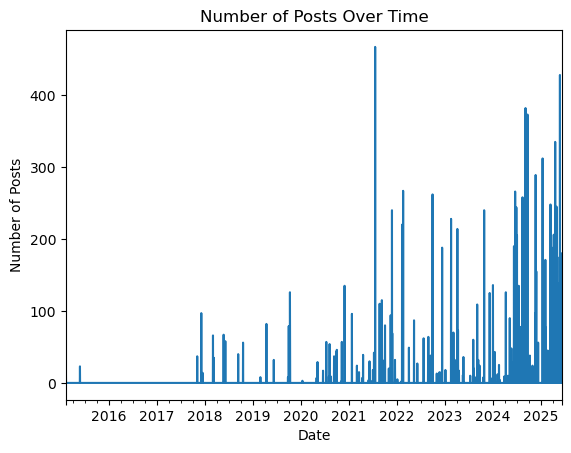

In [ ]:
import pandas as pd

mentalhealth_drop['created_utc'] = pd.to_datetime(mentalhealth_drop['created_utc'], unit='s')

import matplotlib.pyplot as plt

mentalhealth_drop.resample('D', on='created_utc').size().plot()
plt.title("Number of Posts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.show()

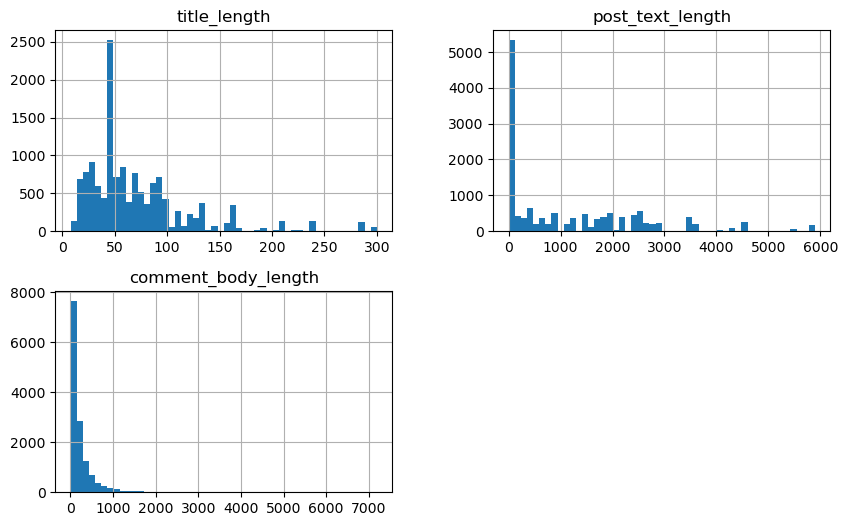

In [ ]:
mentalhealth_drop['title_length'] = mentalhealth_drop['title'].str.len()
mentalhealth_drop['post_text_length'] = mentalhealth_drop['selftext'].str.len()
mentalhealth_drop['comment_body_length'] = mentalhealth_drop['comment_body'].str.len()

mentalhealth_drop[['title_length', 'post_text_length','comment_body_length']].hist(bins=50, figsize=(10,6))
plt.show()

In [ ]:
def plot_wordcloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

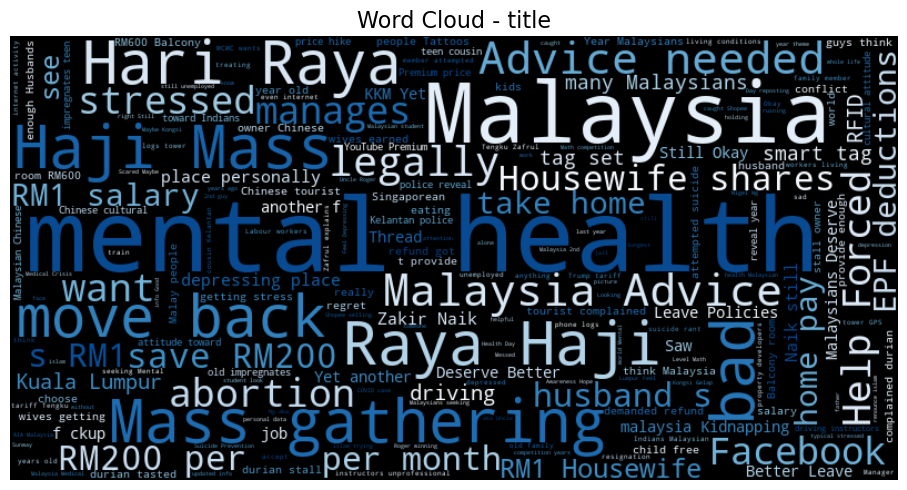

In [ ]:
title = " ".join(comment for comment in mentalhealth_drop['title'])

plot_wordcloud(title, title="Word Cloud - title", colormap='Blues')

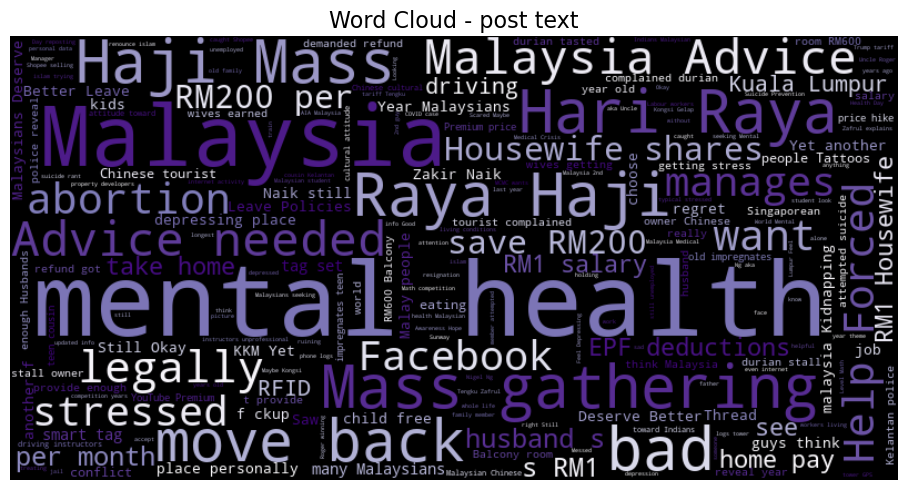

In [ ]:
post_text = " ".join(comment for comment in mentalhealth_drop['selftext'])

plot_wordcloud(title, title="Word Cloud - post text", colormap='Purples')

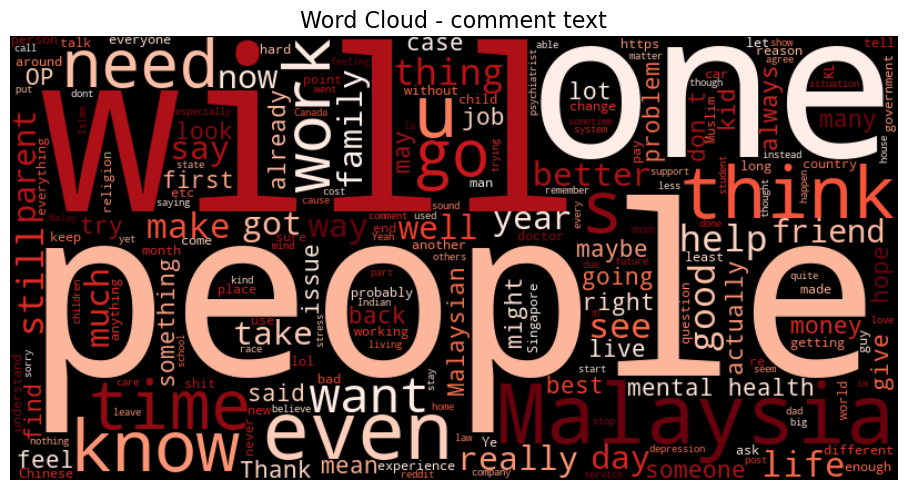

In [ ]:
comment_text = " ".join(comment for comment in mentalhealth_drop['comment_body'])

plot_wordcloud(comment_text, title="Word Cloud - comment text", colormap='Reds')